1.DATASET

In [1]:
import sys
print("Python executable:", sys.executable)
print("Python version:", sys.version)

try:
    import matplotlib
    print("✓ matplotlib imported successfully!")
    print("matplotlib version:", matplotlib.__version__)
except ImportError as e:
    print("✗ Error importing matplotlib:", e)
    print("\nTrying to install matplotlib...")
    import subprocess
    subprocess.check_call([sys.executable, "-m", "pip", "install", "matplotlib"])
    import matplotlib
    print("✓ matplotlib installed and imported!")

Python executable: c:\Users\molhi\Desktop\MLCOURSE\ml-course\.venv\Scripts\python.exe
Python version: 3.14.2 (tags/v3.14.2:df79316, Dec  5 2025, 17:18:21) [MSC v.1944 64 bit (AMD64)]
✓ matplotlib imported successfully!
matplotlib version: 3.10.8


In [2]:
try:
    import seaborn as sns
    print("✓ seaborn imported successfully!")
    print("seaborn version:", sns.__version__)
except ImportError as e:
    print("✗ Error importing seaborn:", e)
    print("\nTrying to install seaborn...")
    import subprocess
    subprocess.check_call([sys.executable, "-m", "pip", "install", "seaborn"])
    import seaborn as sns
    print("✓ seaborn installed and imported!")


✓ seaborn imported successfully!
seaborn version: 0.13.2


In [3]:
#matplotlib forms basic vizualization
import matplotlib as plt
import seaborn as sns 
sns.set_theme()

#graphs in SBG format are sharper and more legible
%config InLineBackend.figure_format = '%SVG'

#increase the plot size and set the color scheme
plt.rcParams["figure.figsize"] = (8, 5)
plt.rcParams["image.cmap"] = "viridis"
import pandas as pd


In [4]:
df = pd.read_csv("https://raw.githubusercontent.com/Yorko/mlcourse.ai/main/data/" + "video_games_sales.csv").dropna()
print(df.shape)

(6825, 16)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6825 entries, 0 to 16706
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             6825 non-null   object 
 1   Platform         6825 non-null   object 
 2   Year_of_Release  6825 non-null   float64
 3   Genre            6825 non-null   object 
 4   Publisher        6825 non-null   object 
 5   NA_Sales         6825 non-null   float64
 6   EU_Sales         6825 non-null   float64
 7   JP_Sales         6825 non-null   float64
 8   Other_Sales      6825 non-null   float64
 9   Global_Sales     6825 non-null   float64
 10  Critic_Score     6825 non-null   float64
 11  Critic_Count     6825 non-null   float64
 12  User_Score       6825 non-null   object 
 13  User_Count       6825 non-null   float64
 14  Developer        6825 non-null   object 
 15  Rating           6825 non-null   object 
dtypes: float64(9), object(7)
memory usage: 906.4+ KB


In [6]:
#when pandas loads some of the numerical features as an object type, the colums
#need to be converted into floot and int
df["User_Score"] = df["User_Score"].astype("float64")
df["Year_of_Release"] = df["Year_of_Release"].astype("int64")
df["User_Count"] = df["User_Count"].astype("int64")
df["Critic_Count"] = df["Critic_Count"].astype("int64")

In [7]:
useful_cols = [
    "Name",
    "Platform",
    "Year_of_Release",
    "Genre",
    "Global_Sales",
    "Critic_Score",
    "Critic_Count",
    "User_Score",
    "User_Count",
    "Rating",
]
df[useful_cols].head()

,Name,Platform,Year_of_Release,Genre,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating
0,Wii Sports,Wii,2006,Sports,82.53,76.0,51,8.0,322,E
2,Mario Kart Wii,Wii,2008,Racing,35.52,82.0,73,8.3,709,E
3,Wii Sports Resort,Wii,2009,Sports,32.77,80.0,73,8.0,192,E
6,New Super Mario Bros.,DS,2006,Platform,29.80,89.0,65,8.5,431,E
7,Wii Play,Wii,2006,Misc,28.92,58.0,41,6.6,129,E


2. DATAFRAME.PLOT()

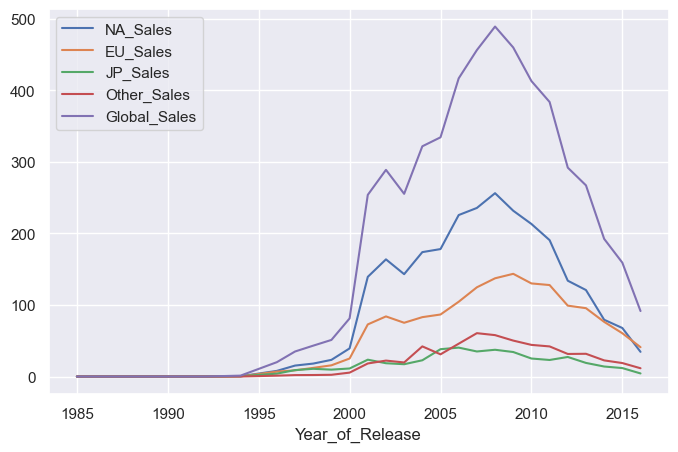

In [8]:
#create a plot of video games sales by country and year

df[[x for x in df.columns if "Sales" in x] + ["Year_of_Release"]].groupby(
    "Year_of_Release"
).sum().plot();

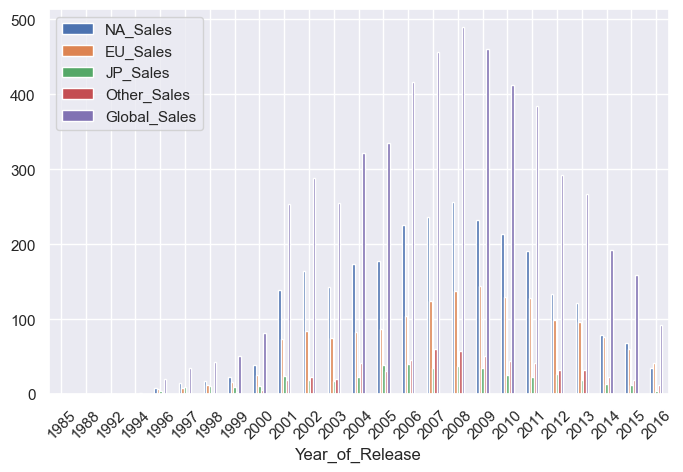

In [9]:
#using the "kind" parameter you can change the type of plot, for example, bar chart
df[[x for x in df.columns if "Sales" in x] + ["Year_of_Release"]].groupby(
    "Year_of_Release"
).sum().plot(kind="bar", rot=45);
#rot is responsible for the angle of ticks in the x axis for vertical plots


3. SEABORN

In [10]:
#seaborn is a higher level of plotting, based on matplotlib.
#by adding import seaborn as sns; sns.set () in your code, the plot's images
#  are nicer

3.1. PAIRPLOT()

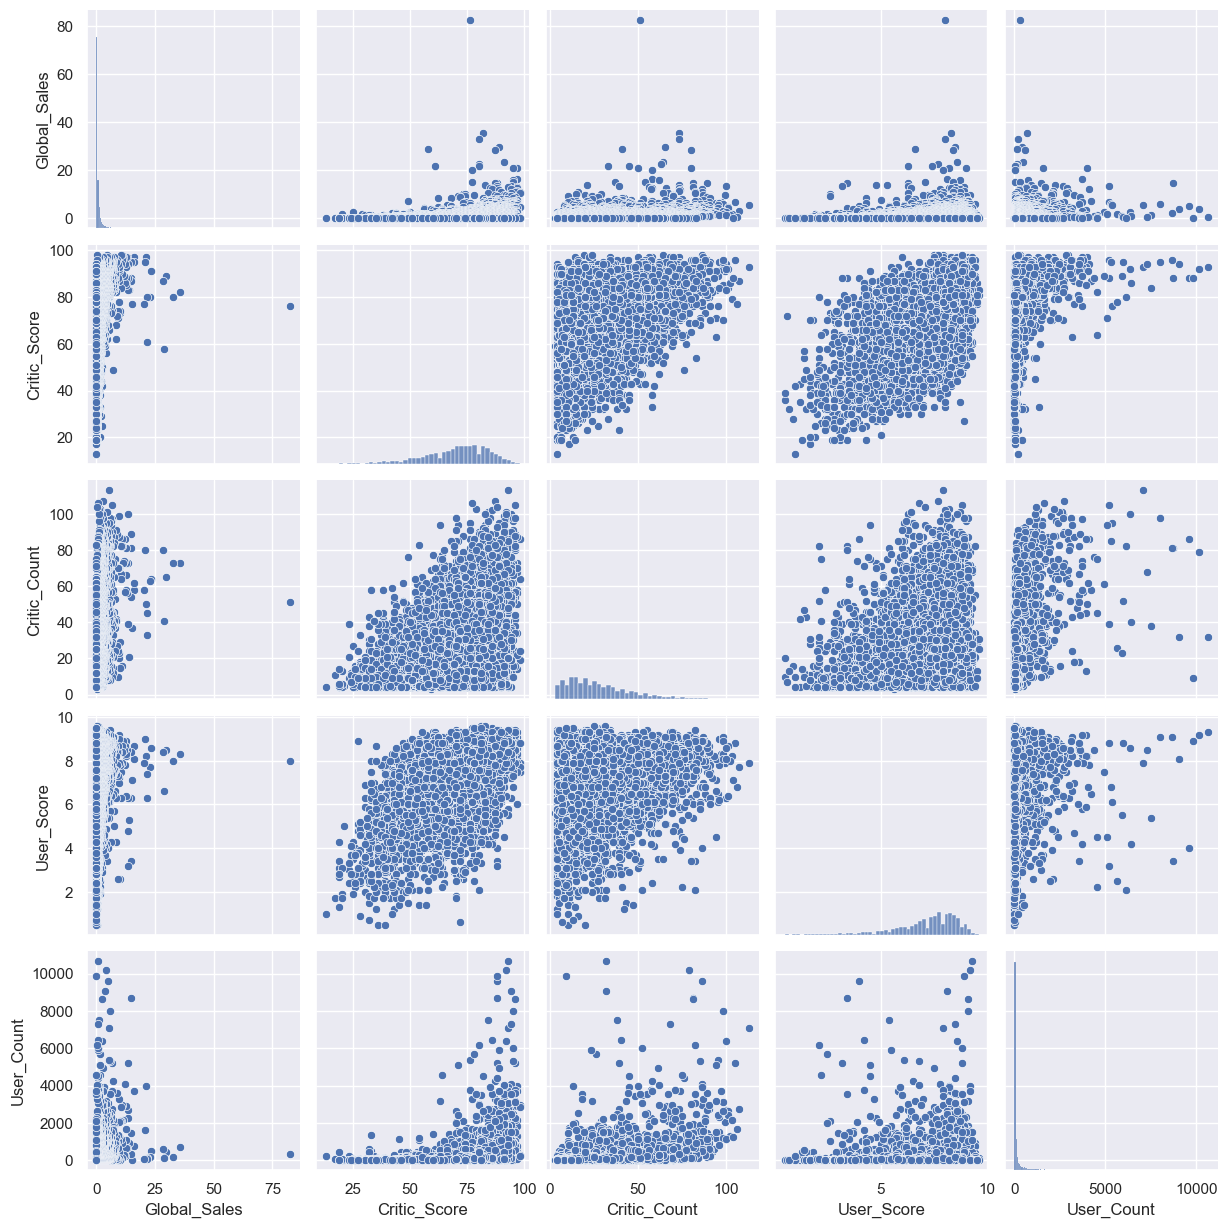

In [11]:
#helps us visualize the relationship between different variables in a single output.

# `pairplot()` may become very slow with the SVG format
%config InlineBackend.figure_format = 'png'
sns.pairplot(
    df[["Global_Sales", "Critic_Score", "Critic_Count", "User_Score", "User_Count"]]
);

3.2. HISPLOT()

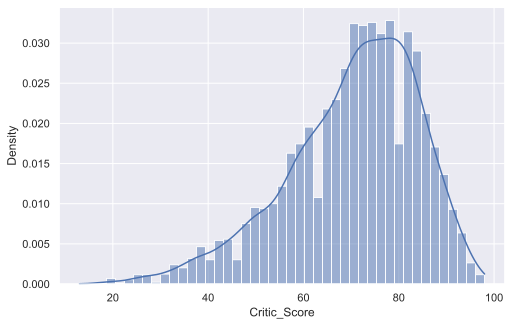

In [12]:
#distribution of critics ratings 

%config InlineBackend.figure_format = 'svg'
sns.histplot(df["Critic_Score"], kde=True, stat="density");

3.3 JOINTPLOT()

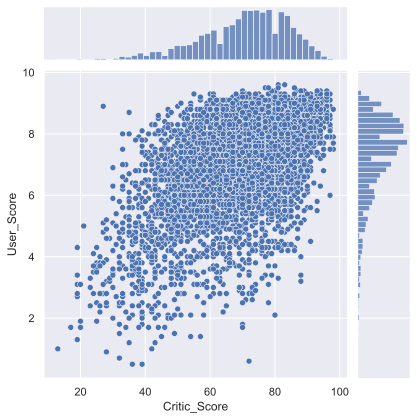

In [13]:
#closer look at a relationship between two numerical variables

sns.jointplot(x="Critic_Score", y="User_Score", data=df, kind="scatter");

3.4. BOXPLOT ()

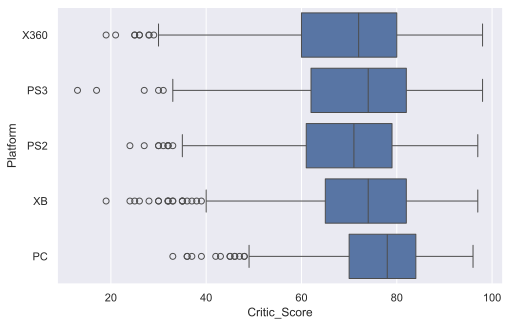

In [ ]:
#compare critics of top 5 biggest gaming platforms

top_platforms = (
    df["Platform"].value_counts().sort_values(ascending=False).head(5).index.values
)
sns.boxplot(
    y="Platform",
    x="Critic_Score",
    data=df[df["Platform"].isin(top_platforms)],
    orient="h",
);

#the components are a box, the whiskers are the outliers
#lenght determined by the 25% (Q1) and 75% (Q3). Vertical line is the median (50%)
#whiskers are the lines extending from the box
#Represent the entire scatter of data points, specifically the point that fall within
#the interval (Q1 - 1.5. IQR , Q3 + 1.5 IQR)
#IQR = Q3 - Q1, where is is the interquartile range


3.5. HEATMAP ()

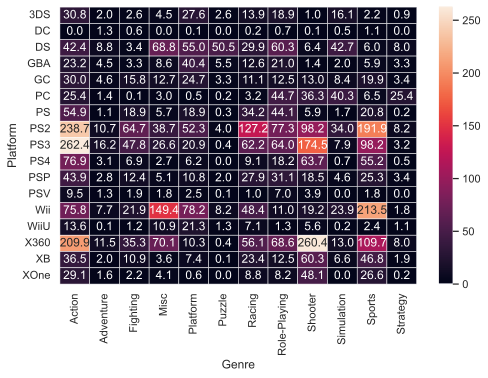

In [15]:
#allows visualization of a numerical variable over two categorical ones

platform_genre_sales = (
    df.pivot_table(
        index="Platform", columns="Genre", values="Global_Sales", aggfunc="sum"
    )
    .fillna(0)
    .map(float)
)
sns.heatmap(platform_genre_sales, annot=True, fmt=".1f", linewidths=0.5);

4. PLOTLY

In [ ]:
#another option for plotting other than matplotlibimport plotlyimport plotly.graph_objs as gofrom plotly.offline import download_plotlyjs, init_notebook_mode, iplot, plotfrom IPython.display import display, IFrameimport osinit_notebook_mode(connected=True)def plotly_depict_figure_as_iframe(fig, title="", width=800, height=500,  plot_path='./plotly_htmls/'):  """  This is a helper method to visualizae PLotly plots as Iframes in a Jupyter book.  If you are running `jupyter-notebook`, you can just use iplot(fig).  """  # in a Jupyter Notebook, the following should work  #iplot(fig, show_link=False)  # in a Jupyter Book, we save a plot offline and then render it with IFrame  # Create directory if it doesn't exist  os.makedirs(plot_path, exist_ok=True)  fig_path_path = f"{plot_path}/{title}.html"  plot(fig, filename=fig_path_path, show_link=False, auto_open=False);  display(IFrame(fig_path_path, width=width, height=height))

4.1. LINE PLOT

In [18]:
#figure is the main class and a work horse of visualization in plotly

years_df = (
    df.groupby("Year_of_Release")[["Global_Sales"]]
    .sum()
    .join(df.groupby("Year_of_Release")[["Name"]].count())
)
years_df.columns = ["Global_Sales", "Number_of_Games"]

In [21]:
#show_link parameter toggles the visibility of the links leading to online platform
#most of the time not needed, turn it off bu passing show_link=False

# Create a line (trace) for the global sales
trace0 = go.Scatter(x=years_df.index, y=years_df["Global_Sales"], name="Global Sales")

# Create a line (trace) for the number of games released
trace1 = go.Scatter(
    x=years_df.index, y=years_df["Number_of_Games"], name="Number of games released"
)

In [22]:

# Define the data array
data = [trace0, trace1]

# Set the title
layout = {"title": "Statistics for video games"}

In [23]:
# Create a Figure and plot it
fig = go.Figure(data=data, layout=layout)

In [27]:
iplot(fig, show_link=False)

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

4.2. BAR CHART

In [28]:
# Do calculations and prepare the dataset
platforms_df = (
    df.groupby("Platform")[["Global_Sales"]]
    .sum()
    .join(df.groupby("Platform")[["Name"]].count())
)
platforms_df.columns = ["Global_Sales", "Number_of_Games"]
platforms_df.sort_values("Global_Sales", ascending=False, inplace=True)

In [29]:
# Create a bar for the global sales
trace0 = go.Bar(
    x=platforms_df.index, y=platforms_df["Global_Sales"], name="Global Sales"
)

# Create a bar for the number of games released
trace1 = go.Bar(
    x=platforms_df.index,
    y=platforms_df["Number_of_Games"],
    name="Number of games released",
)

# Get together the data and style objects
data = [trace0, trace1]
layout = {"title": "Market share by gaming platform"}

# Create a `Figure` and plot it
fig = go.Figure(data=data, layout=layout)
# in a Jupyter Notebook, the following should work
#iplot(fig, show_link=False)

# in a Jupyter Book, we save a plot offline and then render it with IFrame
plotly_depict_figure_as_iframe(fig, title="topic2_part2_plot2")

FileNotFoundError: [Errno 2] No such file or directory: '..\\..\\_static\\plotly_htmls\\topic2_part2_plot2.html'

4.3. BOX PLOTS

In [30]:
data = []

# Create a box trace for each genre in our dataset
for genre in df.Genre.unique():
    data.append(go.Box(y=df[df.Genre == genre].Critic_Score, name=genre))

# Visualize
# in a Jupyter Notebook, the following should work
#iplot(data, show_link=False)

# in a Jupyter Book, we save a plot offline and then render it with IFrame
plotly_depict_figure_as_iframe(data, title="topic2_part2_plot3")

FileNotFoundError: [Errno 2] No such file or directory: '..\\..\\_static\\plotly_htmls\\topic2_part2_plot3.html'